In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Rosenbrock function

The Rosenbrock function is defined as follows:
$$\operatorname{Rosen}(x,y) = (a-x)^2 + b(y-x^2)^2,$$
where $a$ and $b$ are tunable parameters. 

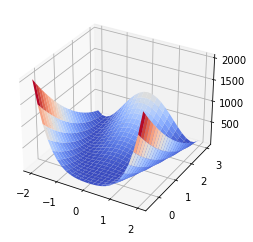

In [2]:
def rosen(Z, a, b): # Z.shape=(2, ...). Z[0,:] = X, Z[1,:] = Y
    return (a - Z[0,:])**2 + b*(Z[1,:]-Z[0,:]**2)**2


a = 1
b = 100

xmin = -2
xmax = 2
nx = 25

ymin = -0.5
ymax = 3
ny = 25

xx = np.linspace(xmin, xmax, nx)
yy = np.linspace(ymin, ymax, ny)

X, Y = np.meshgrid(xx, yy, indexing='xy')
Z = np.array([X,Y])

R = rosen(Z, a, b)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, R, cmap=cm.coolwarm)

plt.show()

# Gradient

The gradient of the Rosenbrock function is given by
$$\operatorname{gradient}(x,y) = \begin{bmatrix}\frac{d \operatorname{Rosen}}{dx}(x,y) \\ \frac{d \operatorname{Rosen}}{dy}(x,y) \end{bmatrix} = \begin{bmatrix}-2a + 4bx^3-4bxy+2x \\
2 b y - 2 b x^2\end{bmatrix}$$

In [3]:
def gradient(Z, a, b):
    g1 = -2*a + 4*b*Z[0,:]**3 - 4*b*Z[0,:]*Z[1,:] + 2*Z[0,:]
    g2 = 2*b*Z[1,:] - 2*b*Z[0,:]**2
    return np.array([g1, g2])


a = np.random.rand()
b = np.random.rand()

Z_shape = (2, 72,31)
Z0 = np.random.randn(*Z_shape)
R0 = rosen(Z0, a, b)
G0 = gradient(Z0, a, b)

dZ = np.random.randn(*Z_shape)
s = 1e-7
Z1 = Z0 + s*dZ
R1 = rosen(Z1, a, b)

dR_diff = (R1 - R0) / s
dR = np.sum(G0*dZ, axis=0)

err_grad = np.linalg.norm(dR - dR_diff) / np.linalg.norm(dR_diff)
print('s=', s, ', err_grad=', err_grad)

s= 1e-07 , err_grad= 8.168918381787341e-08


# Hessian

The Hessian of the Rosenbrock function is given by
$$\operatorname{Hessian}(x,y) = \begin{bmatrix}\frac{d^2 \operatorname{Rosen}}{dx^2}(x,y) & \frac{d^2 \operatorname{Rosen}}{dx dy}(x,y) \\ \frac{d^2 \operatorname{Rosen}}{dy dx}(x,y) & \frac{d^2 \operatorname{Rosen}}{dy^2}(x,y)\end{bmatrix} = \begin{bmatrix}12 b x^2 - 4 b y + 2 & -4 b x \\ -4 b x & 2b\end{bmatrix}$$

In [4]:
def hessian(Z, a, b):
    h11 = 12*b*Z[0,:]**2 - 4*b*Z[1,:] + 2
    h12 = -4*b*Z[0,:]
    h21 = h12
    h22 = 2*b*np.ones(Z[0,:].shape)
    return np.array([[h11, h12], [h21, h22]])


a = np.random.rand()
b = np.random.rand()

Z_shape = (2, 72,31)
Z0 = np.random.randn(*Z_shape)
G0 = gradient(Z0, a, b)
H0 = hessian(Z0, a, b)

dZ = np.random.randn(*Z_shape)
s = 1e-7
Z1 = Z0 + s*dZ
G1 = gradient(Z1, a, b)

dG_diff = (G1 - G0) / s
dG = np.einsum('ijkl,jkl->ikl', H0, dZ)

err_hess = np.linalg.norm(dG - dG_diff) / np.linalg.norm(dG_diff)
print('s=', s, ', err_hess=', err_hess)

s= 1e-07 , err_hess= 8.873226470873583e-08


# Third derivative

The third derivative tensor for the Rosenbrock function, $T = \frac{d^3 \operatorname{Rosen}}{d\mathbf{x}^3}$, has slices
$$T_{0,:,:} = \frac{d H}{dx}(x,y) = \begin{bmatrix}24 b x & -4b \\ -4b & 0\end{bmatrix}$$
and
$$T_{1,:,:} = \frac{d H}{dy}(x,y) = \begin{bmatrix}-4b & 0 \\ 0 & 0\end{bmatrix}$$

In [5]:
def third_derivative(Z, a, b):
    t000 = 24*b*Z[0,:]
    t001 = -4*b*np.ones(Z[0,:].shape)
    t011 = np.zeros(Z[0,:].shape)
    t111 = np.zeros(Z[0,:].shape)
    t010 = t001
    t100 = t001
    t110 = t011
    t101 = t011
    return np.array([[[t000,t001],[t010,t011]], [[t100,t101],[t110,t111]]])


a = np.random.rand()
b = np.random.rand()

Z_shape = (2, 72,31)
Z0 = np.random.randn(*Z_shape)
H0 = hessian(Z0, a, b)
T0 = third_derivative(Z0, a, b)

dZ = np.random.randn(*Z_shape)
s = 1e-7
Z1 = Z0 + s*dZ
H1 = hessian(Z1, a, b)

dH_diff = (H1 - H0) / s
dH = np.einsum('ijklm,klm->ijlm', T0, dZ)

err_third = np.linalg.norm(dH - dH_diff) / np.linalg.norm(dH_diff)
print('s=', s, ', err_third=', err_third)

s= 1e-07 , err_third= 8.073305241413289e-08


# Fourth derivative

The fourth derivative tensor of the Rosenbrock function, $F$, has entry
$$F_{0000} = \frac{d T_{000}}{dx} = 24b$$
all other entries of $F$ are zero.

All higher derivatives of the Rosenbrock function are zero tensors.

In [6]:
def fourth_derivative(Z, a, b):
    F = np.zeros((2,2,2,2,*Z[0,:].shape))
    F[0,0,0,0,:] = 24*b
    return F


a = np.random.rand()
b = np.random.rand()

Z_shape = (2, 72,31)
Z0 = np.random.randn(*Z_shape)
T0 = third_derivative(Z0, a, b)
F0 = fourth_derivative(Z0, a, b)

dZ = np.random.randn(*Z_shape)
s = 1e-7
Z1 = Z0 + s*dZ
T1 = third_derivative(Z1, a, b)

dT_diff = (T1 - T0) / s
dT = np.einsum('ijklmn,lmn->ijkmn', F0, dZ)

err_fourth = np.linalg.norm(dT - dT_diff) / np.linalg.norm(dT_diff)
print('s=', s, ', err_fourth=', err_fourth)

s= 1e-07 , err_fourth= 8.222190725276663e-10


# Least squares form

The Rosenbrock function may be written in least squares form as follows:
$$\operatorname{Rosen}(x,y) = \frac{1}{2}||\operatorname{residual}(x,y)||^2,$$
where
$$\operatorname{residual}(x,y) = d - f(x,y)$$
and
$$d = \sqrt{2}\begin{bmatrix}a \\ 0\end{bmatrix}, \qquad f(x,y) = \sqrt{2}\begin{bmatrix}x \\ \sqrt{b}(x^2 - y)\end{bmatrix}.$$

In [7]:
def residual(Z, a, b):
    return np.sqrt(2) * np.array([a - Z[0,:], 
                                    - np.sqrt(b)*(Z[0,:]**2 - Z[1,:])])


Z = np.random.randn(2, 72,31)
R = rosen(Z, a, b)
R_lsq = 0.5*np.linalg.norm(residual(Z, a, b), axis=0)**2

err_lsq = np.linalg.norm(R - R_lsq) / np.linalg.norm(R)
print('err_lsq=', err_lsq)

err_lsq= 2.027539484959404e-16


# Jacobian

The Jacobian of $f$, denoted $J$, is
$$J = \begin{bmatrix}\frac{df}{dx}(x,y) & \frac{df}{dy}(x,y) \end{bmatrix} = \sqrt{2}\begin{bmatrix}1 & 0 \\ 2\sqrt{b}x & -\sqrt{b}\end{bmatrix}$$

In [8]:
def jacobian(Z, a, b):
    j00 = np.ones(Z[0,:].shape)
    j01 = np.zeros(Z[0,:].shape)
    j10 = 2*np.sqrt(b)*Z[0,:]
    j11 = -np.sqrt(b)*np.ones(Z[0,:].shape)
    return np.sqrt(2) * np.array([[j00, j01],[j10, j11]])


a = np.random.rand()
b = np.random.rand()

Z_shape = (2, 72,31)
Z0 = np.random.randn(*Z_shape)
res0 = residual(Z0, a, b)
J0 = jacobian(Z0, a, b)

dZ = np.random.randn(*Z_shape)
s = 1e-7
Z1 = Z0 + s*dZ
res1 = residual(Z1, a, b)

df_diff = -(res1 - res0) / s # minus sign because res = d - f
df = np.einsum('ijkl,jkl->ikl', J0, dZ)

err_jac = np.linalg.norm(df - df_diff) / np.linalg.norm(df_diff)
print('s=', s, ', err_jac=', err_jac)

s= 1e-07 , err_jac= 4.302207829421568e-08


# Jacobian gradient

The gradient of the Jacobian, $Q$, has slices
$$Q_{0,:,:} = \frac{dJ}{dx} = \begin{bmatrix}0 & 0 \\ 2 \sqrt{2 b} & 0\end{bmatrix}$$
and
$$Q_{1,:,:} = \frac{dJ}{dy} = \begin{bmatrix}0 & 0 \\ 0 & 0\end{bmatrix}$$

Notice: here we use the convention where the derivative modes are first and last, and the function output mode is in the middle. I.e.,
$$Q_{ijk} = \frac{d J_{jk}}{dx_i} = \frac{d^2 f_j}{dx_i dx_k}$$

All higher derivatives of the Jacobian are zero

In [9]:
def jacobian_gradient(Z, a, b):
    Q = np.zeros((2,2,2,*Z[0,:].shape))
    Q[0,1,0] = 2*np.sqrt(2*b)
    return Q

a = np.random.rand()
b = np.random.rand()

Z_shape = (2, 72,31)
Z0 = np.random.randn(*Z_shape)
J0 = jacobian(Z0, a, b)
GJ0 = jacobian_gradient(Z0, a, b)

dZ = np.random.randn(*Z_shape)
s = 1e-7
Z1 = Z0 + s*dZ
J1 = jacobian(Z1, a, b)

dJ_diff = (J1 - J0) / s
dJ = np.einsum('ijklm,ilm->jklm', GJ0, dZ)

err_jacgrad = np.linalg.norm(dJ - dJ_diff) / np.linalg.norm(dJ_diff)
print('s=', s, ', err_jacgrad=', err_jacgrad)

s= 1e-07 , err_jacgrad= 1.0816083446405767e-09


# Gauss-Newton Hessian

The Gauss-Newton Hessian is given by
$$H_{\text{gn}} = J^T J = \begin{bmatrix}2+8bx^2 & -4bx \\ -4bx & 2b\end{bmatrix}$$
where $J$ is the Jacobian of $f$.

The Gauss-Newton Hessian agrees with the true Hessian at any points where the residual is zero, if such points exist. For the Rosenbrock function, the residual happens to be zero at the minimum point, which is $(a, a^2)$.

In [10]:
def gauss_newton_hessian(Z, a, b):
    hg00 = 2 + 8*b*Z[0,:]**2
    hg01 = -4*b*Z[0,:]
    hg10 = hg01
    hg11 = 2*b*np.ones(Z[0,:].shape)
    return np.array([[hg00, hg01],[hg10, hg11]])

def gauss_newton_hessian_alternative(Z, a, b):
    J = jacobian(Z, a, b)
    J_reshaped = J.reshape((2,2,-1))
    return np.einsum('xik,xjk->ijk', J_reshaped, J_reshaped).reshape((2,2,*Z[0,:].shape))


a = np.random.rand()
b = np.random.rand()

Z_shape = (2, 34,25)
Z = np.random.randn(*Z_shape)
Hgn = gauss_newton_hessian(Z, a, b)
Hgn_alt = gauss_newton_hessian_alternative(Z, a, b)

err_Hgn_check1 = np.linalg.norm(Hgn - Hgn_alt) / np.linalg.norm(Hgn_alt)
print('err_Hgn_check1=', err_Hgn_check1)


Z = np.array([[a],[a**2]])

res = residual(Z, a, b)
print('res=', res)

H = hessian(Z, a, b)
Hgn = gauss_newton_hessian(Z, a, b)

err_Hgn_check2 = np.linalg.norm(H - Hgn)
print('err_Hgn_check2=', err_Hgn_check2)

err_Hgn_check1= 2.8513817601387487e-16
res= [[ 0.]
 [-0.]]
err_Hgn_check2= 0.0


# Gauss-Newton Hessian gradient

The Gradient of the Gauss-Newton Hessian, denoted $Y$, has slices
$$Y_{:,0,:} = \frac{dH_\text{gn}}{dx} = \begin{bmatrix}16bx & -4b \\ -4b & 0\end{bmatrix}$$
and
$$Y_{:,1,:} = \frac{dH_\text{gn}}{dy} = \begin{bmatrix}0 & 0 \\ 0 & 0\end{bmatrix}.$$

Notice: here the gradient mode is in the middle ($j$), and the matrix modes are first and last ($i,k$) in $Y_{ijk}$

<!-- Re-arranging the modes of the tensor so that the gradient mode is in the middle ($j$), and the matrix modes are first and last ($i,k$), the tensor $Y_{ijk}$ representing the gradient of the Gauss-Newton Hessian has slices
$$Y_{0,:,:} = $$

$$\frac{d \left(H_\text{gn}\right)_{ik}}{dx_j} = \left(J^T\right)_{is} \frac{d J_{sk}}{dj} + \frac{d J_{is}}{dj} J_{sk} = J_{si} Q_{sjk} + Q_{ijs} J_{sk} = M_{ijk} + M_{kji},$$
where $M_{ijk} := J_{si} Q_{sjk}$

Notice: here the gradient mode is in the middle ($j$), and the matrix modes are first and last ($i,k$) -->

In [11]:
def gauss_newton_hessian_gradient(Z, a, b):
    Y = np.zeros((2,2,2,*Z[0,:].shape))
    Y[0,0,0,:] = 16*b*Z[0,:]
    Y[0,0,1,:] = -4*b
    Y[1,0,0,:] = -4*b
    return Y


a = np.random.rand()
b = np.random.rand()

Z_shape = (2, 72,31)
Z0 = np.random.randn(*Z_shape)
Hgn0 = gauss_newton_hessian(Z0, a, b)
GHgn0 = gauss_newton_hessian_gradient(Z0, a, b)

dZ = np.random.randn(*Z_shape)
s = 1e-7
Z1 = Z0 + s*dZ
Hgn1 = gauss_newton_hessian(Z1, a, b)

dHgn_diff = (Hgn1 - Hgn0) / s
dHgn = np.einsum('ijklm,jlm->iklm', GHgn0, dZ)

err_Hgngrad = np.linalg.norm(dHgn - dHgn_diff) / np.linalg.norm(dHgn_diff)
print('s=', s, ', err_Hgngrad=', err_Hgngrad)

s= 1e-07 , err_Hgngrad= 8.44106359831669e-08


# Hessian of Gauss-Newton Hessian

The Hessian of the Gauss-Newton Hessian (i.e., the second derivative of the Gauss-Newton Hessian) is all zero, except the $(0,0,0,0)$ entry of the tensor, which is $16b$. The tensor is ordered $i,j,k,l$, where the outer modes $i,l$ are the matrix modes for the original Gauss-Newton Hessian, and the inner modes $j,k$ are the derivative modes.

All higher derivatives of the Gauss-Newton Hessian are zero.

In [12]:
def gauss_newton_hessian_hessian(Z, a, b): # Hessian of a Hessian!
    W = np.zeros((2,2,2,2,*Z[0,:].shape))
    W[0,0,0,0,:] = 16*b
    return W


a = np.random.rand()
b = np.random.rand()

Z_shape = (2, 72,31)
Z0 = np.random.randn(*Z_shape)
GHgn0 = gauss_newton_hessian_gradient(Z0, a, b)
HHgn0 = gauss_newton_hessian_hessian(Z0, a, b)

dZ = np.random.randn(*Z_shape)
s = 1e-7
Z1 = Z0 + s*dZ
GHgn1 = gauss_newton_hessian_gradient(Z1, a, b)

dGHgn_diff = (GHgn1 - GHgn0) / s
dGHgn = np.einsum('ijklmn,kmn->ijlmn', HHgn0, dZ)

err_Hgnhess = np.linalg.norm(dGHgn - dGHgn_diff) / np.linalg.norm(dGHgn_diff)
print('s=', s, ', err_Hgnhess=', err_Hgnhess)

s= 1e-07 , err_Hgnhess= 7.958976232870597e-10


# Complete code

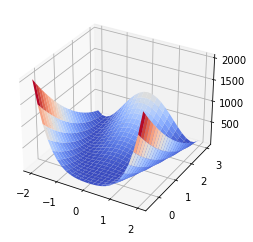

s= 1e-07 , err_grad= 1.048202652478558e-07
s= 1e-07 , err_hess= 9.005076228815677e-08
s= 1e-07 , err_third= 7.994559897247578e-08
s= 1e-07 , err_fourth= 8.222028569955139e-10
err_lsq= 1.7439963051592058e-16
s= 1e-07 , err_jac= 5.745319517324217e-08
s= 1e-07 , err_jacgrad= 1.0743079910046346e-09
err_Hgn_check1= 1.7752499115376201e-16
res= [[ 0.]
 [-0.]]
err_Hgn_check2= 8.881784197001252e-16
s= 1e-07 , err_Hgngrad= 8.218280488456954e-08
s= 1e-07 , err_Hgnhess= 7.711142869463538e-10


In [13]:
import numpy as np


def rosen(Z, a, b): # Z.shape=(2, ...). Z[0,:] = X, Z[1,:] = Y
    return (a - Z[0,:])**2 + b*(Z[1,:]-Z[0,:]**2)**2


def gradient(Z, a, b):
    g1 = -2*a + 4*b*Z[0,:]**3 - 4*b*Z[0,:]*Z[1,:] + 2*Z[0,:]
    g2 = 2*b*Z[1,:] - 2*b*Z[0,:]**2
    return np.array([g1, g2])


def hessian(Z, a, b):
    h11 = 12*b*Z[0,:]**2 - 4*b*Z[1,:] + 2
    h12 = -4*b*Z[0,:]
    h21 = h12
    h22 = 2*b*np.ones(Z[0,:].shape)
    return np.array([[h11, h12], [h21, h22]])


def third_derivative(Z, a, b):
    t000 = 24*b*Z[0,:]
    t001 = -4*b*np.ones(Z[0,:].shape)
    t011 = np.zeros(Z[0,:].shape)
    t111 = np.zeros(Z[0,:].shape)
    t010 = t001
    t100 = t001
    t110 = t011
    t101 = t011
    return np.array([[[t000,t001],[t010,t011]], [[t100,t101],[t110,t111]]])


def fourth_derivative(Z, a, b):
    F = np.zeros((2,2,2,2,*Z[0,:].shape))
    F[0,0,0,0,:] = 24*b
    return F


def residual(Z, a, b):
    return np.sqrt(2) * np.array([a - Z[0,:], 
                                    - np.sqrt(b)*(Z[0,:]**2 - Z[1,:])])


def jacobian(Z, a, b):
    j00 = np.ones(Z[0,:].shape)
    j01 = np.zeros(Z[0,:].shape)
    j10 = 2*np.sqrt(b)*Z[0,:]
    j11 = -np.sqrt(b)*np.ones(Z[0,:].shape)
    return np.sqrt(2) * np.array([[j00, j01],[j10, j11]])


def jacobian_gradient(Z, a, b):
    Q = np.zeros((2,2,2,*Z[0,:].shape))
    Q[0,1,0] = 2*np.sqrt(2*b)
    return Q


def gauss_newton_hessian(Z, a, b):
    hg00 = 2 + 8*b*Z[0,:]**2
    hg01 = -4*b*Z[0,:]
    hg10 = hg01
    hg11 = 2*b*np.ones(Z[0,:].shape)
    return np.array([[hg00, hg01],[hg10, hg11]])


def gauss_newton_hessian_gradient(Z, a, b):
    Y = np.zeros((2,2,2,*Z[0,:].shape))
    Y[0,0,0,:] = 16*b*Z[0,:]
    Y[0,0,1,:] = -4*b
    Y[1,0,0,:] = -4*b
    return Y


def gauss_newton_hessian_hessian(Z, a, b): # Hessian of a Hessian!
    W = np.zeros((2,2,2,2,*Z[0,:].shape))
    W[0,0,0,0,:] = 16*b
    return W


# Plots and derivative checks

import matplotlib.pyplot as plt
from matplotlib import cm

# Plot Rosenbrock function

a = 1
b = 100

xmin = -2
xmax = 2
nx = 25

ymin = -0.5
ymax = 3
ny = 25

xx = np.linspace(xmin, xmax, nx)
yy = np.linspace(ymin, ymax, ny)

X, Y = np.meshgrid(xx, yy, indexing='xy')
Z = np.array([X,Y])

R = rosen(Z, a, b)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, R, cmap=cm.coolwarm)

plt.show()


# Check gradient

a = np.random.rand()
b = np.random.rand()

Z_shape = (2, 72,31)
Z0 = np.random.randn(*Z_shape)
R0 = rosen(Z0, a, b)
G0 = gradient(Z0, a, b)

dZ = np.random.randn(*Z_shape)
s = 1e-7
Z1 = Z0 + s*dZ
R1 = rosen(Z1, a, b)

dR_diff = (R1 - R0) / s
dR = np.sum(G0*dZ, axis=0)

err_grad = np.linalg.norm(dR - dR_diff) / np.linalg.norm(dR_diff)
print('s=', s, ', err_grad=', err_grad)


# Check Hessian


a = np.random.rand()
b = np.random.rand()

Z_shape = (2, 72,31)
Z0 = np.random.randn(*Z_shape)
G0 = gradient(Z0, a, b)
H0 = hessian(Z0, a, b)

dZ = np.random.randn(*Z_shape)
s = 1e-7
Z1 = Z0 + s*dZ
G1 = gradient(Z1, a, b)

dG_diff = (G1 - G0) / s
dG = np.einsum('ijkl,jkl->ikl', H0, dZ)

err_hess = np.linalg.norm(dG - dG_diff) / np.linalg.norm(dG_diff)
print('s=', s, ', err_hess=', err_hess)


# Check third derivative

a = np.random.rand()
b = np.random.rand()

Z_shape = (2, 72,31)
Z0 = np.random.randn(*Z_shape)
H0 = hessian(Z0, a, b)
T0 = third_derivative(Z0, a, b)

dZ = np.random.randn(*Z_shape)
s = 1e-7
Z1 = Z0 + s*dZ
H1 = hessian(Z1, a, b)

dH_diff = (H1 - H0) / s
dH = np.einsum('ijklm,klm->ijlm', T0, dZ)

err_third = np.linalg.norm(dH - dH_diff) / np.linalg.norm(dH_diff)
print('s=', s, ', err_third=', err_third)


# Check fourth derivative

a = np.random.rand()
b = np.random.rand()

Z_shape = (2, 72,31)
Z0 = np.random.randn(*Z_shape)
T0 = third_derivative(Z0, a, b)
F0 = fourth_derivative(Z0, a, b)

dZ = np.random.randn(*Z_shape)
s = 1e-7
Z1 = Z0 + s*dZ
T1 = third_derivative(Z1, a, b)

dT_diff = (T1 - T0) / s
dT = np.einsum('ijklmn,lmn->ijkmn', F0, dZ)

err_fourth = np.linalg.norm(dT - dT_diff) / np.linalg.norm(dT_diff)
print('s=', s, ', err_fourth=', err_fourth)


# Check least squares residual function

Z = np.random.randn(2, 72,31)
R = rosen(Z, a, b)
R_lsq = 0.5*np.linalg.norm(residual(Z, a, b), axis=0)**2

err_lsq = np.linalg.norm(R - R_lsq) / np.linalg.norm(R)
print('err_lsq=', err_lsq)


# Check Jacobian

a = np.random.rand()
b = np.random.rand()

Z_shape = (2, 72,31)
Z0 = np.random.randn(*Z_shape)
res0 = residual(Z0, a, b)
J0 = jacobian(Z0, a, b)

dZ = np.random.randn(*Z_shape)
s = 1e-7
Z1 = Z0 + s*dZ
res1 = residual(Z1, a, b)

df_diff = -(res1 - res0) / s # minus sign because res = d - f
df = np.einsum('ijkl,jkl->ikl', J0, dZ)

err_jac = np.linalg.norm(df - df_diff) / np.linalg.norm(df_diff)
print('s=', s, ', err_jac=', err_jac)


# Check Jacobian gradient

a = np.random.rand()
b = np.random.rand()

Z_shape = (2, 72,31)
Z0 = np.random.randn(*Z_shape)
J0 = jacobian(Z0, a, b)
GJ0 = jacobian_gradient(Z0, a, b)

dZ = np.random.randn(*Z_shape)
s = 1e-7
Z1 = Z0 + s*dZ
J1 = jacobian(Z1, a, b)

dJ_diff = (J1 - J0) / s
dJ = np.einsum('ijklm,ilm->jklm', GJ0, dZ)

err_jacgrad = np.linalg.norm(dJ - dJ_diff) / np.linalg.norm(dJ_diff)
print('s=', s, ', err_jacgrad=', err_jacgrad)


# Check Gauss-Newton Hessian

def gauss_newton_hessian_alternative(Z, a, b):
    J = jacobian(Z, a, b)
    J_reshaped = J.reshape((2,2,-1))
    return np.einsum('xik,xjk->ijk', J_reshaped, J_reshaped).reshape((2,2,*Z[0,:].shape))


a = np.random.rand()
b = np.random.rand()

Z_shape = (2, 34,25)
Z = np.random.randn(*Z_shape)
Hgn = gauss_newton_hessian(Z, a, b)
Hgn_alt = gauss_newton_hessian_alternative(Z, a, b)

err_Hgn_check1 = np.linalg.norm(Hgn - Hgn_alt) / np.linalg.norm(Hgn_alt)
print('err_Hgn_check1=', err_Hgn_check1)


Z = np.array([[a],[a**2]])

res = residual(Z, a, b)
print('res=', res)

H = hessian(Z, a, b)
Hgn = gauss_newton_hessian(Z, a, b)

err_Hgn_check2 = np.linalg.norm(H - Hgn)
print('err_Hgn_check2=', err_Hgn_check2)


# Check Gauss-Newton Hessian gradient

a = np.random.rand()
b = np.random.rand()

Z_shape = (2, 72,31)
Z0 = np.random.randn(*Z_shape)
Hgn0 = gauss_newton_hessian(Z0, a, b)
GHgn0 = gauss_newton_hessian_gradient(Z0, a, b)

dZ = np.random.randn(*Z_shape)
s = 1e-7
Z1 = Z0 + s*dZ
Hgn1 = gauss_newton_hessian(Z1, a, b)

dHgn_diff = (Hgn1 - Hgn0) / s
dHgn = np.einsum('ijklm,jlm->iklm', GHgn0, dZ)

err_Hgngrad = np.linalg.norm(dHgn - dHgn_diff) / np.linalg.norm(dHgn_diff)
print('s=', s, ', err_Hgngrad=', err_Hgngrad)


# Check Hessian of Gauss-Newton Hessian

a = np.random.rand()
b = np.random.rand()

Z_shape = (2, 72,31)
Z0 = np.random.randn(*Z_shape)
GHgn0 = gauss_newton_hessian_gradient(Z0, a, b)
HHgn0 = gauss_newton_hessian_hessian(Z0, a, b)

dZ = np.random.randn(*Z_shape)
s = 1e-7
Z1 = Z0 + s*dZ
GHgn1 = gauss_newton_hessian_gradient(Z1, a, b)

dGHgn_diff = (GHgn1 - GHgn0) / s
dGHgn = np.einsum('ijklmn,kmn->ijlmn', HHgn0, dZ)

err_Hgnhess = np.linalg.norm(dGHgn - dGHgn_diff) / np.linalg.norm(dGHgn_diff)
print('s=', s, ', err_Hgnhess=', err_Hgnhess)

0.0
0.9999425472455946


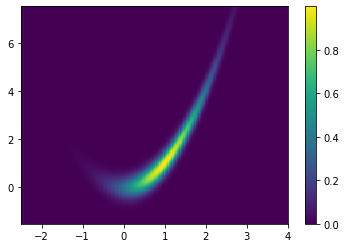

In [49]:
a = 1
b = 5

xmin = -2.5
xmax = 4
nx = 200

ymin = -1.5
ymax = 7.5
ny = 200

xx = np.linspace(xmin, xmax, nx)
yy = np.linspace(ymin, ymax, ny)

X, Y = np.meshgrid(xx, yy, indexing='xy')
Z = np.array([X,Y])

R = rosen(Z, a, b)

pi = np.exp(-R)
print(np.min(pi))
print(np.max(pi))

fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(X, Y, pi, cmap=cm.coolwarm)
plt.pcolor(X, Y, pi)
plt.colorbar()

plt.show()

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(X, Y, R, cmap=cm.coolwarm)

# plt.show()

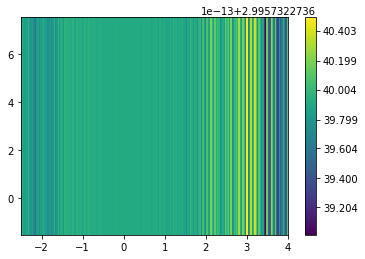

In [68]:
HH = np.moveaxis(gauss_newton_hessian(Z, a, b),[0,1,2,3],[2,3,0,1])
HH.shape
logdets = np.log(np.linalg.det(HH))

plt.pcolor(X, Y, logdets)
plt.colorbar()

/tmp/ipykernel_84925/185729276.py:3: RuntimeWarning: invalid value encountered in log
  logdets = np.log(np.linalg.det(HH))


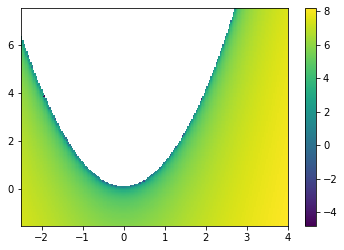

In [70]:
HH = np.moveaxis(hessian(Z, a, b),[0,1,2,3],[2,3,0,1])
HH.shape
logdets = np.log(np.linalg.det(HH))

plt.pcolor(X, Y, logdets)
plt.colorbar()

In [69]:
logdets

array([[2.99573227, 2.99573227, 2.99573227, ..., 2.99573227, 2.99573227,
        2.99573227],
       [2.99573227, 2.99573227, 2.99573227, ..., 2.99573227, 2.99573227,
        2.99573227],
       [2.99573227, 2.99573227, 2.99573227, ..., 2.99573227, 2.99573227,
        2.99573227],
       ...,
       [2.99573227, 2.99573227, 2.99573227, ..., 2.99573227, 2.99573227,
        2.99573227],
       [2.99573227, 2.99573227, 2.99573227, ..., 2.99573227, 2.99573227,
        2.99573227],
       [2.99573227, 2.99573227, 2.99573227, ..., 2.99573227, 2.99573227,
        2.99573227]])

2.1522884553193797e-18
0.9979034354360995


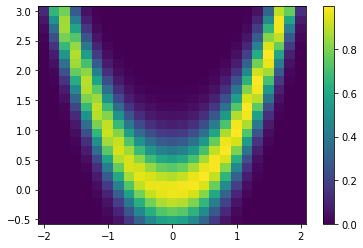

In [34]:
pi = np.exp(-R/50)
print(np.min(pi))
print(np.max(pi))

fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(X, Y, pi, cmap=cm.coolwarm)
plt.pcolor(X, Y, pi)
plt.colorbar()

plt.show()